# Практическая работа 1. Источники данных. Извлечение данных



ФИО: Олифир Алина Александровна

Группа: АДЭУ-201

Используем данные из открытого источника для `CSV`, `Parquet` и `API`, а также вручную подготовим данные для баз данных и HTML  из открытых данных (доступно по адресу https://data.cityofnewyork.us).

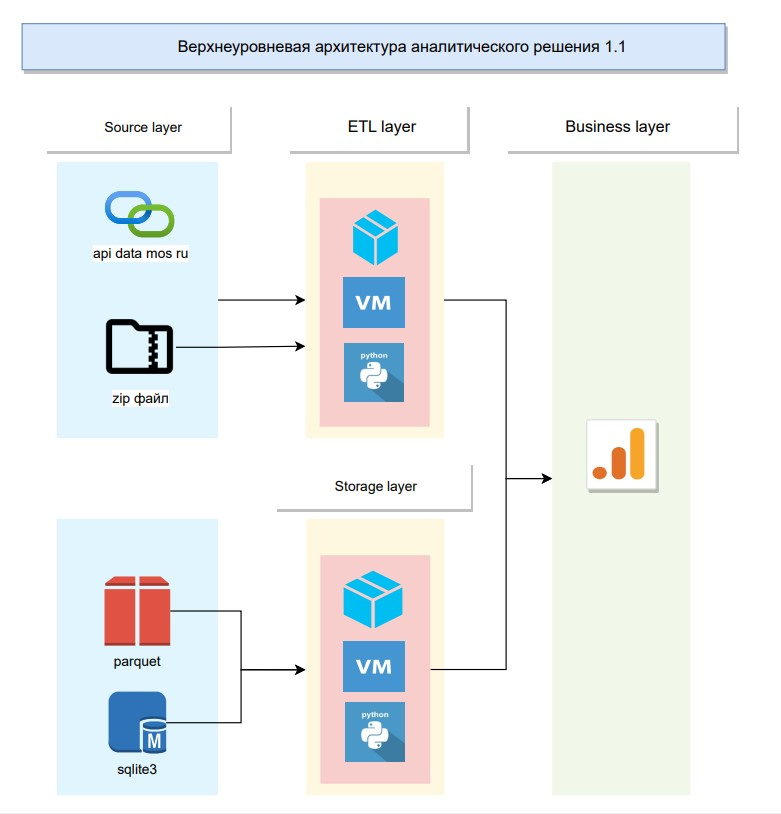

In [2]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

1.1 Файлы данных `CSV` и `Excel`

Файлы данных могут быть получены откуда угодно: от файлов, хранящихся локально на вашем устройстве, до файловых систем облачного хранилища.

Даже при работе в основном с базами данных или внешними `API` использование физических файлов — отличный способ легко использовать данные с метками времени, что может пригодиться при любых временных проблемах с подключением.

In [ ]:
# Загрузите данные с портала открытых данных Правительства Москвы —
# данные о Wi-Fi в кинотеатрах, введя в браузер следующий URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false.
# Будет загружен CSV-файл *.csv. Сохраните этот файл.
# прочитать данные CSV, используя команду Pandas pd.read_csv() в качестве df DataFrame, затем выберите первые пять строк DataFrame с помощью df.head().

**Задание 1.1.** Зайти на сайт URL-адрес: https://data.mos.ru/opendata/60789?isDynamic=false

**Задание 1.2.** Загрузить данные о `Wi-Fi в кинотеатрах` в Colab.

**Задание 1.3.** Считайте данные из файла CSV. Использовать метод `pandas read_csv` для простоты и скорости.

In [3]:
df_csv = pd.read_csv(r"C:\Users\aalin\Downloads\data-60789-2024-01-24.csv", delimiter=';')
df_csv.head()

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
0,global_id,Код,Наименование кинотеатра,Административный округ,Район,Адрес,Количество точек доступа,Имя Wi-Fi сети,"Зона покрытия, в метрах",Признак функционирования,Условия доступа,Пароль,Широта в WGS-84,Долгота в WGS-84,geoData,geodata_center,NaN
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN


**Задание 1.4.** Так как первая строка включает определение столбцов, удалить строку с `index=0`.

In [4]:
data = df_csv.drop(df_csv.index[0])

In [5]:
data.head(10)

,global_id,ID,CinemaName,AdmArea,District,Address,NumberOfAccessPoints,WiFiName,CoverageArea,FunctionFlag,AccessFlag,Password,Latitude_WGS84,Longitude_WGS84,geoData,geodata_center,Unnamed: 16
1,879791944,1,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Останкинский район,"Российская Федерация, город Москва, внутригоро...",7,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.818675,37.636778,"{coordinates=[37.636778, 55.818675], type=Point}",NaN,NaN
2,879791951,3,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Печатники,"город Москва, улица Кухмистерова, дом 4",8,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.685873,37.718534,"{coordinates=[37.718534, 55.685873], type=Point}",NaN,NaN
3,879791953,4,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Текстильщики,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.710864,37.731299,"{coordinates=[37.731299, 55.710864], type=Point}",NaN,NaN
4,879791961,7,Государственное бюджетное учреждение культуры ...,Северный административный округ,Тимирязевский район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.814406,37.571210,"{coordinates=[37.57121, 55.814406], type=Point}",NaN,NaN
5,879791967,9,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,район Свиблово,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.851945,37.647549,"{coordinates=[37.647549, 55.851945], type=Point}",NaN,NaN
6,879795206,2,Государственное бюджетное учреждение культуры ...,Северо-Восточный административный округ,Бабушкинский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.861974,37.676825,"{coordinates=[37.676825, 55.861974], type=Point}",NaN,NaN
7,879795207,5,Государственное бюджетное учреждение культуры ...,Юго-Восточный административный округ,район Лефортово,"Российская Федерация, город Москва, внутригоро...",4,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.764303,37.705508,"{coordinates=[37.705508, 55.764303], type=Point}",NaN,NaN
8,879795208,6,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Академический район,"Российская Федерация, город Москва, внутригоро...",3,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.682787,37.571585,"{coordinates=[37.571585, 55.682787], type=Point}",NaN,NaN
9,879795209,8,Государственное бюджетное учреждение культуры ...,Восточный административный округ,район Новогиреево,"Российская Федерация, город Москва, внутригоро...",6,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.749841,37.802562,"{coordinates=[37.802562, 55.749841], type=Point}",NaN,NaN
10,879795211,10,Государственное бюджетное учреждение культуры ...,Юго-Западный административный округ,Обручевский район,"Российская Федерация, город Москва, внутригоро...",5,Moscow_WiFi_Free,50,действует,открытая сеть,NaN,55.665309,37.513395,"{coordinates=[37.513395, 55.665309], type=Point}",NaN,NaN


In [6]:
data = data.pivot_table(index='AdmArea', values='NumberOfAccessPoints', aggfunc='mean').sort_values(by='NumberOfAccessPoints', ascending=False).head(4)
data

,NumberOfAccessPoints
AdmArea,
Юго-Восточный административный округ,2160.750000
Северо-Восточный административный округ,251.666667
Юго-Западный административный округ,17.500000
Восточный административный округ,6.000000


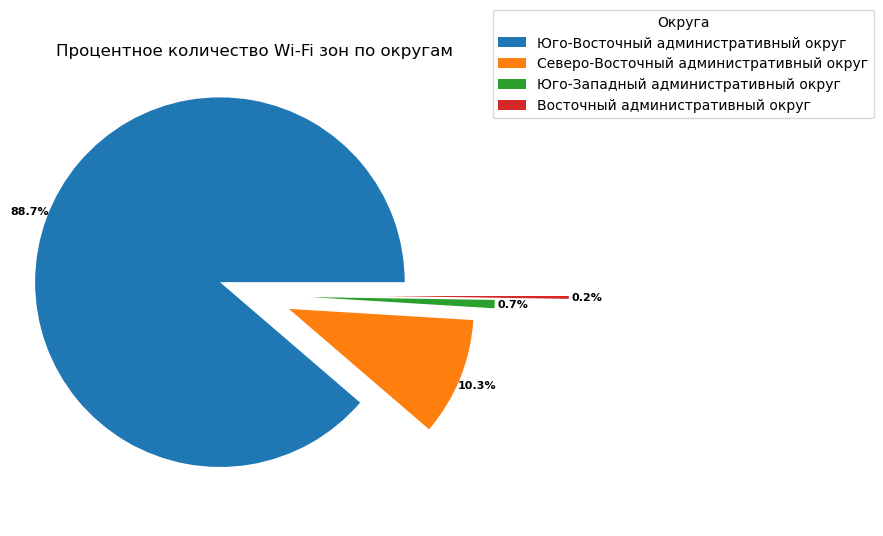

In [7]:
import matplotlib.pyplot as plt

# Создание круговой диаграммы с добавлением заголовка и легенды
fig, ax = plt.subplots(figsize=(6, 6))
explode = (0.2, 0.2, 0.3, 0.7)
wedges, texts, autotexts = ax.pie(data['NumberOfAccessPoints'], labels=['' for _ in data.index], autopct='%1.1f%%', pctdistance=1.1, explode = explode)

plt.setp(autotexts, size=8, weight="bold")  # увеличиваем размер и делаем текст жирным
plt.title('Процентное количество Wi-Fi зон по округам')

# Создание легенды
plt.legend(wedges, data.index, title="Округа", loc="center left", bbox_to_anchor=(1, 0, 0.5, 2))

plt.show()

# **Задание 1.5.** Выполнить парсинг веб-страницы с помощью `JSON`

In [8]:
# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

In [9]:
resp = reqs.request(method='GET', url='https://apidata.mos.ru/v1/datasets/60789/features?api_key=c4e60190-fb89-4e8e-8c47-43d2a14ca3cd')

**Задание 1.6.** Выполнить парсинг веб-страницы с помощью `JSON`. Получите URL-адрес:

In [10]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/60789/features?api_key=c4e60190-fb89-4e8e-8c47-43d2a14ca3cd


**Задание 1.7.** Выполнить парсинг веб-страницы с помощью `JSON`. Определите тип контента:

In [11]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


**Задание 1.8.** Выполнить парсинг веб-страницы с помощью `JSON`. Обработайте данные с помощью JSON:

In [12]:
if resp.status_code == 200:
   json_page = json.loads(resp.text)

**Задание 1.9.**  Обработайте данные с помощью `JSON`. Посмотреть на ключи:

In [13]:
for x in json_page:
    print(x)

features
type


Распечатать ключи и значения:

In [14]:
for x in json_page:
    print(f"{x} --> {json_page[x]} \n")

features --> [{'geometry': {'coordinates': [37.636778, 55.818675], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 1, 'CinemaName': 'Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»', 'AdmArea': 'Северо-Восточный административный округ', 'District': 'Останкинский район', 'Address': 'Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109', 'NumberOfAccessPoints': 7, 'WiFiName': 'Moscow_WiFi_Free', 'CoverageArea': 50, 'FunctionFlag': 'действует', 'AccessFlag': 'открытая сеть', 'Password': '', 'Latitude_WGS84': '55.818675', 'Longitude_WGS84': '37.636778', 'global_id': 879791944}, 'rowId': None, 'versionNumber': 1, 'releaseNumber': 32}, 'type': 'Feature'}, {'geometry': {'coordinates': [37.718534, 55.685873], 'type': 'Point'}, 'properties': {'datasetId': 60789, 'attributes': {'is_deleted': 0, 'ID': 3, 'CinemaName': 'Государственн

In [15]:
pprint.pprint(json_page)

{'features': [{'geometry': {'coordinates': [37.636778, 55.818675],
                            'type': 'Point'},
               'properties': {'attributes': {'AccessFlag': 'открытая сеть',
                                             'Address': 'Российская Федерация, '
                                                        'город Москва, '
                                                        'внутригородская '
                                                        'территория '
                                                        'муниципальный округ '
                                                        'Останкинский, '
                                                        'проспект Мира, дом '
                                                        '109',
                                             'AdmArea': 'Северо-Восточный '
                                                        'административный '
                                                        'округ',
  

# **Задание 1.10.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`

 <font color='blue'>Парсинг веб-страниц с помощью Beautiful Soup</font>

- Веб-скрапинг позволяет загрузить HTML-код веб-сайта и извлечь необходимые вам данные.
- Beautiful Soup — это библиотека Python для очистки данных с веб-сайтов.
- Beautiful Soup создает дерево разбора из проанализированных документов HTML и XML.

In [16]:
from bs4 import BeautifulSoup as bso

In [17]:
# Отправление запроса на получение данных и присваивание ответ переменной.
source = reqs.get("https://apidata.mos.ru/v1/datasets/60789/features?api_key=c4e60190-fb89-4e8e-8c47-43d2a14ca3cd")

In [18]:
print(f"Content type: \n\t {source.headers['content-type']}")

Content type: 
	 application/json


In [19]:
print(source)

<Response [200]>


**Задание 1.10.1.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Создать beautiful soup объект.

In [20]:
mysoup = bso(source.text, 'html.parser')

**Задание 1.10.2.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Распечатайте HTML-содержимое страницы, используя метод prettify

In [21]:
print(mysoup.prettify())

{"features":[{"geometry":{"coordinates":[37.636778,55.818675],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":1,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино» Кинотеатр «Москино Космос»","AdmArea":"Северо-Восточный административный округ","District":"Останкинский район","Address":"Российская Федерация, город Москва, внутригородская территория муниципальный округ Останкинский, проспект Мира, дом 109","NumberOfAccessPoints":7,"WiFiName":"Moscow_WiFi_Free","CoverageArea":50,"FunctionFlag":"действует","AccessFlag":"открытая сеть","Password":"","Latitude_WGS84":"55.818675","Longitude_WGS84":"37.636778","global_id":879791944},"rowId":null,"versionNumber":1,"releaseNumber":32},"type":"Feature"},{"geometry":{"coordinates":[37.718534,55.685873],"type":"Point"},"properties":{"datasetId":60789,"attributes":{"is_deleted":0,"ID":3,"CinemaName":"Государственное бюджетное учреждение культуры города Москвы «Московское кино»

**Задание 1.10.3.** Выполнить парсинг веб-страницы с помощью `Beautiful Soup`. Получить заголовок страницы

In [22]:
print(mysoup.title)

None


# Получение данных из таблиц РСУБД

**Задание 1.11.** Считать результаты запроса sqlite в DataFrame pandas

In [23]:
# Считываем результаты запроса sqlite в DataFrame pandas
with sqlite3.connect(r"C:\Users\aalin\Downloads\movies.sqlite") as conn:
    dfi = pd.read_sql("SELECT * from movies", conn)
dfi.head()

,id,original_title,budget,popularity,release_date,revenue,title,vote_average,vote_count,overview,tagline,uid,director_id
0,43597,Avatar,237000000,150,2009-12-10,2787965087,Avatar,7.2,11800,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,19995,4762
1,43598,Pirates of the Caribbean: At World's End,300000000,139,2007-05-19,961000000,Pirates of the Caribbean: At World's End,6.9,4500,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",285,4763
2,43599,Spectre,245000000,107,2015-10-26,880674609,Spectre,6.3,4466,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,206647,4764
3,43600,The Dark Knight Rises,250000000,112,2012-07-16,1084939099,The Dark Knight Rises,7.6,9106,Following the death of District Attorney Harve...,The Legend Ends,49026,4765
4,43601,John Carter,260000000,43,2012-03-07,284139100,John Carter,6.1,2124,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",49529,4766


In [24]:
pivot_df = dfi.pivot_table(index='title', values='vote_average', aggfunc='mean').sort_values(by='vote_average', ascending=False).head()
pivot_df

,vote_average
title,
Stiff Upper Lips,10.0
"Dancer, Texas Pop. 81",10.0
Sardaarji,9.5
One Man's Hero,9.3
There Goes My Baby,8.5


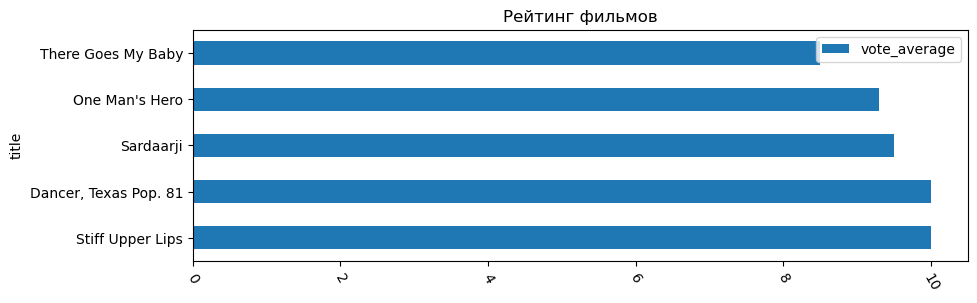

In [25]:
pivot_df.plot(kind='barh', figsize=(10, 3))
plt.xticks(rotation=-60)
plt.title('Рейтинг фильмов')
plt.show()

# Получение данных `Parquet`

Посетите URL https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

**Задание 1.12.** Считайте данные из файла Parquet. Использовать метод pandas read_parquet.

In [52]:
pip install pyarrow


     ---------------------------------------- 24.8/24.8 MB 9.2 MB/s eta 0:00:00


In [26]:
df_parquet = pd.read_parquet(r"C:\Users\aalin\Downloads\yellow_tripdata_2023-03.parquet")
df_parquet.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [27]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3403766 entries, 0 to 3403765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [28]:
dfp = df_parquet.pivot_table(index='tpep_pickup_datetime', values='total_amount', aggfunc='sum').head()
dfp

,total_amount
tpep_pickup_datetime,
2001-01-01 00:06:49,46.90
2001-01-01 00:08:42,81.80
2001-01-01 15:18:51,43.00
2002-12-31 23:10:19,35.45
2002-12-31 23:33:00,81.80


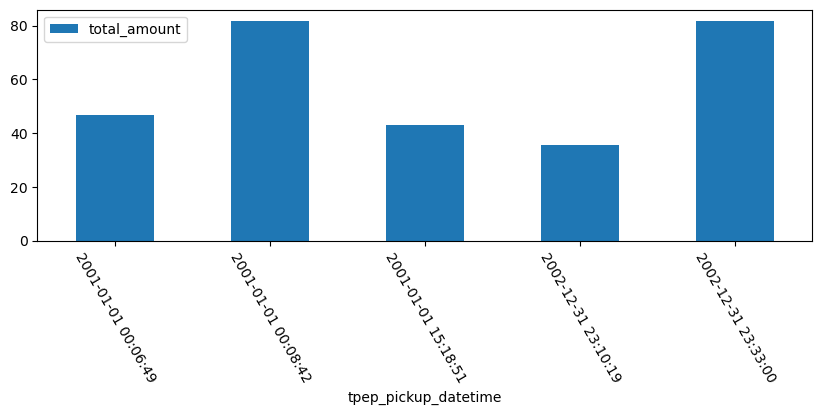

In [29]:
dfp.plot(kind='bar', figsize=(10, 3))
plt.xticks(rotation=-60)
plt.show()

# Индивидуальное задание

- Загрузить задание в среду colab.research

- Выполнить задания `1-11`, результаты сохранить в файле `ПР_1_ФИО.ipynb`.

- Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных:

1. Сайт Мосбиржи — основной сайт инвестора. Очень много полезной информации о ценных бумагах, валютах — https://www.moex.com/

2. Список биржевых инвестиционных фондов (ETF) на Московской бирже — https://www.moex.com/msn/etf

3. Сайт Санкт-Петербургской биржи — https://spbexchange.ru/

4. Список акций иностранных компаний, которые можно купить на Санкт-Петербургской бирже — http://stocks.spbexchange.ru/

5. ETF от FinEx — https://finex-etf.ru/products/

6. Котировки всех в мире акций, дивидендный календарь по акциям, курсы всех валют — https://ru.investing.com/

7. Котировки и курсы акций в режиме реального времени с фильтром по тем странам, которые вас интересуют, — https://ru.investing.com/equities/

8. Информация о дивидендах по российским акциям — https://www.dohod.ru/ik/analytics/dividend/

9. Дивиденды российских и американских компаний — https://investmint.ru/

10. Сервис с информацией по российским облигациям — https://bonds.finam.ru/

11. Анализ российских облигаций — https://www.dohod.ru/analytic/bonds

12. Котировки корпоративных облигаций — https://smart-lab.ru/q/bonds/

13. Иностранные акции, инвестиционные идеи — https://finviz.com/

14. Сервис для ведения портфеля ценных бумаг. Можно сделать публичный доступ и показать портфель своим друзьям, например — https://intelinvest.ru/

15. Журнал «Тинькофф». Информация о финансах, инвестициях, бесплатное обучение — https://journal.tinkoff.ru/pro/invest/

16. Обучающие курсы от Мосбиржи. Там же полезные сервисы в помощь инвесторам — https://red-circule.com/

17. Новости компаний и новая информация по акциям — https://smart-lab.ru/news/

18. Ожидаемые события фондового рынка — https://bcs-express.ru/ozhidaemye-sobytiya
Подробнее на сайте Banki.ru https://www.banki.ru/news/lenta/?id=10936184

19. Реестр сведений о банкротстве — https://bankrot.fedresurs.ru/

20. Реестр доверенностей — https://www.reestr-dover.ru/

21. Реестр уведомлений о залоге движимого имущества — https://www.reestr-zalogov.ru/state/index

22. Узнать свою кредитную историю — https://www.nbki.ru/serviceszaem/svedeniya/

23. Узнать задолженность на сайте ФССП. Не только свою — http://fssp.gov.ru/iss/ip/

24. О пособиях для безработных в 2020 году — https://www.gosuslugi.ru/help/news/2020_05_08_work_pay

25. Проект Банка России по финансовой грамотности — https://fincult.info/
Подробнее на сайте Banki.ru https://www.banki.ru/news/lenta/?id=1093618

- Выполнить парсинг коллекции данных на Портале открытых данных Правительства Москвы. Выявить показатели в наборе данных(изучить три датасета. Предоставить BI-табло результатов):

1. Торговля.

2. Дороги и транспорт.

3. ЖКХ.

4. Образование.

5. Трудоустройство

6. Здравоохранение.

7. Социальная среда.

8. Справочная информация.

9. Земля и имущество.

10. Культура.

11. Досух и отдых.

12. Предпринимательство.

13. Торговля-2.

14. Дороги и транспорт-2.

15. ЖКХ-2.

16. Образование-2.

17. Трудоустройство-2.

18. Здравоохранение-2.

19. Социальная среда-2.

20. Справочная информация-2.

21. Земля и имущество-2.

22. Культура-2.

23. Досух и отдых-2.

24. Предпринимательство-2.

25. Торговля-3.



# Индивидуально задание 1.2 Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных

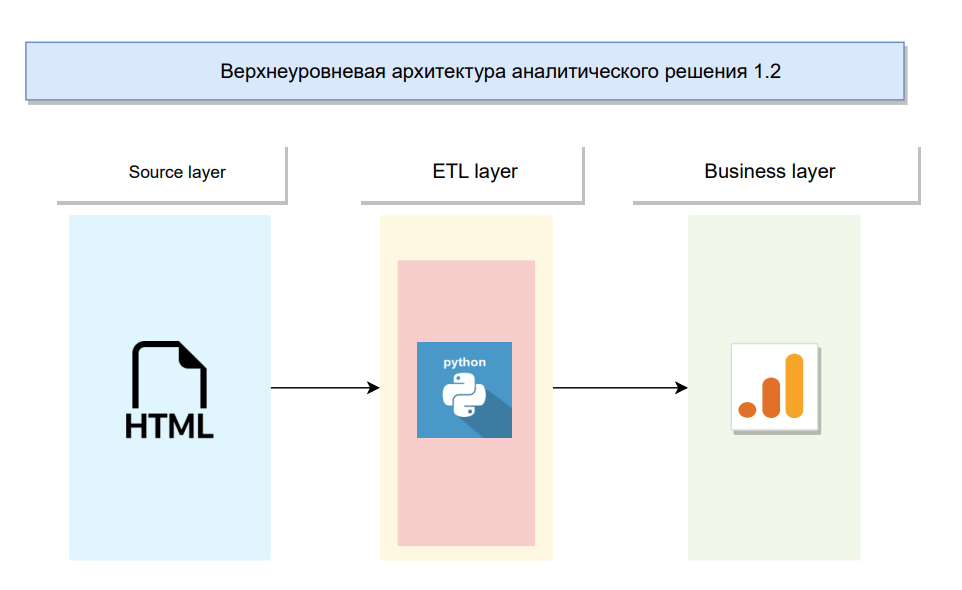

Источник данных - [Российские ценные бумаги СПБ Биржи](https://spbexchange.ru/stocks/russian/instruments/?page%3D0%26size%3D100%26sortBy%3DsecurityKind%26sortByDirection%3Ddesc)

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://spbexchange.ru/stocks/russian/instruments/?page%3D0%26size%3D100%26sortBy%3DsecurityKind%26sortByDirection%3Ddesc'

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', {'class': 'Table_display__TKDq5'})
rows = table.find_all('tr')

data = []
headers = [header.text for header in rows[0].find_all('th')]

for row in rows[1:]:
    values = [value.text.strip() for value in row.find_all('td')]
    data.append(dict(zip(headers, values)))

df = pd.DataFrame(data)
df


,№,Код ЦБ,Наименование эмитента,ISIN,CFI,Лот,Шаг цены,Валюта цены,Дата начала торгов,"Вид, категория (тип) ЦБ"
0,1,Atomenpr01,"акционерное общество ""Атомный энергопромышленн...",RU000A103AT8,DBFUFB,1,"0,01",Процент от номинальной стоимости,15.12.2022,Облигации биржевые
1,2,ATRR01,"Общество с ограниченной ответственностью ""АНТЕ...",RU000A104V59,DBFUFB,1,"0,01",Процент от номинальной стоимости,24.06.2022,Облигации биржевые
2,3,DIRP01,"Общество с ограниченной ответственностью ""Диом...",RU000A100KC9,DBVUFB,1,"0,01",Процент от номинальной стоимости,11.07.2019,Облигации биржевые
3,4,DIRP02,"Общество с ограниченной ответственностью ""Диом...",RU000A100RX0,DBVUFB,1,"0,01",Процент от номинальной стоимости,28.08.2019,Облигации биржевые
4,5,DIRP03,"Общество с ограниченной ответственностью ""Диом...",RU000A1016D0,DBVUFB,1,"0,01",Процент от номинальной стоимости,16.12.2019,Облигации биржевые
5,6,DMNN01,"Акционерное общество Управляющая компания ""Дом...",RU000A103KW1,DBVUFB,1,"0,01",Процент от номинальной стоимости,25.08.2021,Облигации биржевые
6,7,DSKY,"Публичное акционерное общество ""Детский мир""",RU000A0JSQ90,ESVXFR,10,"0,02",Российский рубль,20.08.2021,Акции обыкновенные
7,8,ELFV,"Публичное акционерное общество ""ЭЛ5-ЭНЕРГО""",RU000A0F5UN3,ESVXFR,1000,"0,0002",Российский рубль,05.05.2022,Акции обыкновенные
8,9,FEES,"Публичное акционерное общество ""Федеральная се...",RU000A0JPNN9,ESVXFR,10000,"0,00002",Российский рубль,09.06.2014,Акции обыкновенные
9,10,FIPO,"Общество с ограниченной ответственностью ""Упра...",RU000A101NK4,CICXLU,1,"0,2",Российский рубль,04.09.2020,Инвестиционные паи закрытого паевого инвестици...


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   №                        52 non-null     object
 1   Код ЦБ                   52 non-null     object
 2   Наименование эмитента    52 non-null     object
 3   ISIN                     52 non-null     object
 4   CFI                      52 non-null     object
 5   Лот                      52 non-null     object
 6   Шаг цены                 52 non-null     object
 7   Валюта цены              52 non-null     object
 8   Дата начала торгов       52 non-null     object
 9   Вид, категория (тип) ЦБ  52 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB


In [32]:
df['Лот'] = df['Лот'].astype(int)
df['Шаг цены'] = df['Шаг цены'].str.replace(',', '.').astype(float)
df['Дата начала торгов'] = pd.to_datetime(df['Дата начала торгов'])

C:\Users\aalin\AppData\Local\Temp\ipykernel_15952\328605208.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Дата начала торгов'] = pd.to_datetime(df['Дата начала торгов'])


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   №                        52 non-null     object        
 1   Код ЦБ                   52 non-null     object        
 2   Наименование эмитента    52 non-null     object        
 3   ISIN                     52 non-null     object        
 4   CFI                      52 non-null     object        
 5   Лот                      52 non-null     int32         
 6   Шаг цены                 52 non-null     float64       
 7   Валюта цены              52 non-null     object        
 8   Дата начала торгов       52 non-null     datetime64[ns]
 9   Вид, категория (тип) ЦБ  52 non-null     object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 4.0+ KB


In [34]:
df.rename(columns={'Вид, категория (тип) ЦБ': 'Тип ЦБ'}, inplace=True)
df

,№,Код ЦБ,Наименование эмитента,ISIN,CFI,Лот,Шаг цены,Валюта цены,Дата начала торгов,Тип ЦБ
0,1,Atomenpr01,"акционерное общество ""Атомный энергопромышленн...",RU000A103AT8,DBFUFB,1,0.01000,Процент от номинальной стоимости,2022-12-15,Облигации биржевые
1,2,ATRR01,"Общество с ограниченной ответственностью ""АНТЕ...",RU000A104V59,DBFUFB,1,0.01000,Процент от номинальной стоимости,2022-06-24,Облигации биржевые
2,3,DIRP01,"Общество с ограниченной ответственностью ""Диом...",RU000A100KC9,DBVUFB,1,0.01000,Процент от номинальной стоимости,2019-11-07,Облигации биржевые
3,4,DIRP02,"Общество с ограниченной ответственностью ""Диом...",RU000A100RX0,DBVUFB,1,0.01000,Процент от номинальной стоимости,2019-08-28,Облигации биржевые
4,5,DIRP03,"Общество с ограниченной ответственностью ""Диом...",RU000A1016D0,DBVUFB,1,0.01000,Процент от номинальной стоимости,2019-12-16,Облигации биржевые
5,6,DMNN01,"Акционерное общество Управляющая компания ""Дом...",RU000A103KW1,DBVUFB,1,0.01000,Процент от номинальной стоимости,2021-08-25,Облигации биржевые
6,7,DSKY,"Публичное акционерное общество ""Детский мир""",RU000A0JSQ90,ESVXFR,10,0.02000,Российский рубль,2021-08-20,Акции обыкновенные
7,8,ELFV,"Публичное акционерное общество ""ЭЛ5-ЭНЕРГО""",RU000A0F5UN3,ESVXFR,1000,0.00020,Российский рубль,2022-05-05,Акции обыкновенные
8,9,FEES,"Публичное акционерное общество ""Федеральная се...",RU000A0JPNN9,ESVXFR,10000,0.00002,Российский рубль,2014-09-06,Акции обыкновенные
9,10,FIPO,"Общество с ограниченной ответственностью ""Упра...",RU000A101NK4,CICXLU,1,0.20000,Российский рубль,2020-04-09,Инвестиционные паи закрытого паевого инвестици...


In [35]:
df1 = df.pivot_table(index='Наименование эмитента', values='Лот', aggfunc='mean').sort_values(by='Лот', ascending=False)
df1.head(7)

,Лот
Наименование эмитента,
"Публичное акционерное общество ""Федеральная сетевая компания - Россети""",10000.0
"Публичное акционерное общество ""Интер РАО ЕЭС""",1000.0
"Публичное акционерное общество энергетики и электрификации ""Мосэнерго""",1000.0
"Публичное акционерное общество ""ЭЛ5-ЭНЕРГО""",1000.0
"Публичное акционерное общество ""Федеральная гидрогенерирующая компания - РусГидро""",1000.0
"публичное акционерное общество ""Сургутнефтегаз""",100.0
"Публичное акционерное общество ""Новороссийский морской торговый порт""",100.0


Text(0, 0.5, '')

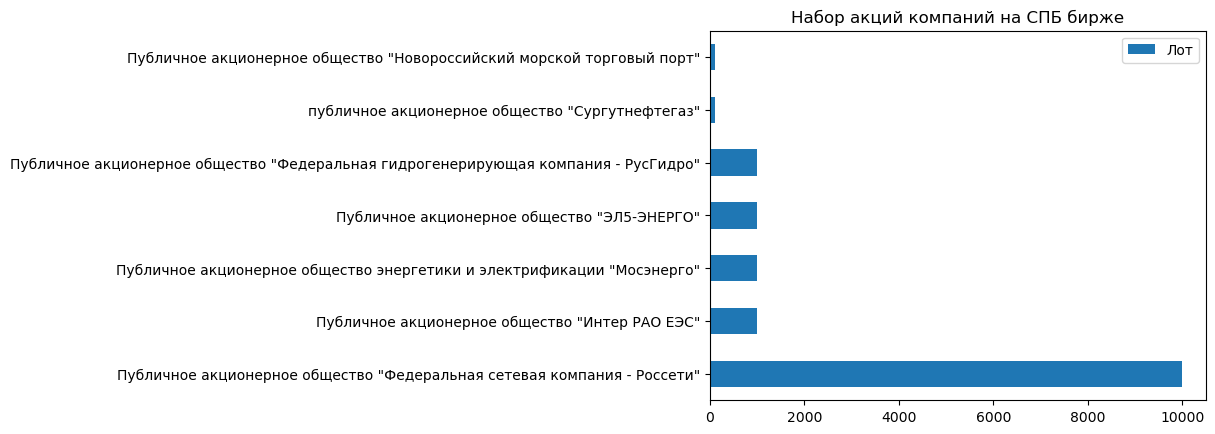

In [36]:
import matplotlib.pyplot as plt

df1.head(7).plot(kind='barh')
plt.title('Набор акций компаний на СПБ бирже')
plt.gca().set_ylabel('')

Вывод: для инвестора со стратегией снижения рисков больше подойдут такие компании, как "Сургутнефтьгаз", "Мосэнерго", "Новороссийский морской торговый порт", так как можно распределить инвестиции между различными активами.

In [37]:
df2 = df.pivot_table(index='Наименование эмитента', values='Шаг цены', aggfunc='mean').sort_values(by='Шаг цены', ascending=False)
df2.head(7)

,Шаг цены
Наименование эмитента,
"Публичное акционерное общество ""Транснефть""",50.0
"Публичное акционерное общество ""Горно-металлургическая компания ""Норильский никель""",2.0
"Публичное акционерное общество ""ФосАгро""",1.0
"Публичное акционерное общество ""Нефтяная компания ""ЛУКОЙЛ""",0.5
"Публичное акционерное общество ""Магнит""",0.5
"Публичное акционерное общество ""Группа Черкизово""",0.5
"публичное акционерное общество ""НОВАТЭК""",0.2


Text(0, 0.5, '')

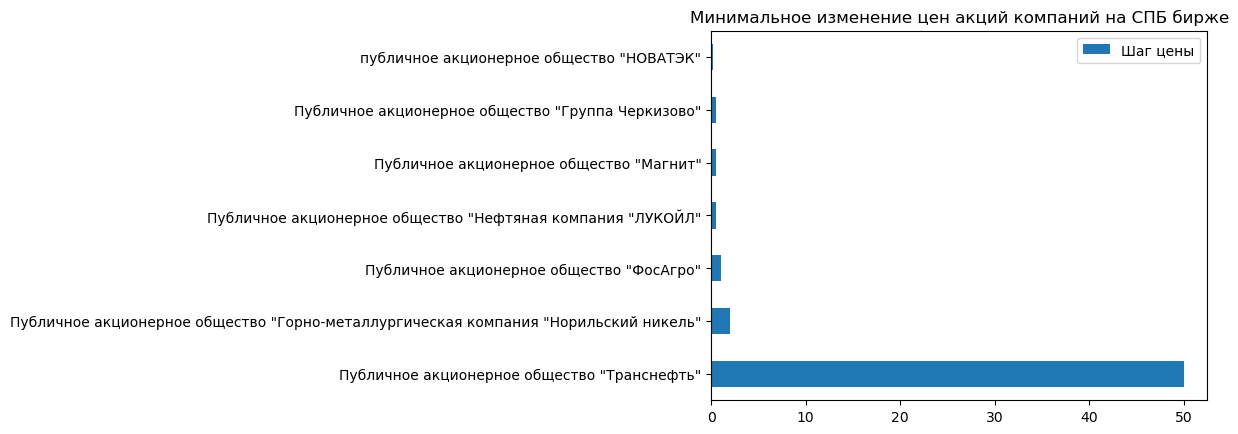

In [38]:
import matplotlib.pyplot as plt

df2.head(7).plot(kind='barh')
plt.title('Минимальное изменение цен акций компаний на СПБ бирже')
plt.gca().set_ylabel('')

Вывод: непривлекательными компаниями для инвесторов могут стать "НОВАТЭК", "Группа Черкизово", "Магнит", "ЛУКОЙЛ", так как у них самое минимальное изменение цены на бирже.

In [39]:
dfd = df1.join(df2, on='Наименование эмитента')
dfd.head(7)

,Лот,Шаг цены
Наименование эмитента,,
"Публичное акционерное общество ""Федеральная сетевая компания - Россети""",10000.0,0.00002
"Публичное акционерное общество ""Интер РАО ЕЭС""",1000.0,0.00050
"Публичное акционерное общество энергетики и электрификации ""Мосэнерго""",1000.0,0.00050
"Публичное акционерное общество ""ЭЛ5-ЭНЕРГО""",1000.0,0.00020
"Публичное акционерное общество ""Федеральная гидрогенерирующая компания - РусГидро""",1000.0,0.00010
"публичное акционерное общество ""Сургутнефтегаз""",100.0,0.00500
"Публичное акционерное общество ""Новороссийский морской торговый порт""",100.0,0.00500


# Индивидуально задание 1.3 Выполнить парсинг коллекции даных на Портале открытых данных Правительства Москвы

Источник данных - [Ежемесячная сводная статистика в части жилищно-коммунальных услуг по городу Москве](https://data.mos.ru/opendata/2981?isDynamic=false)

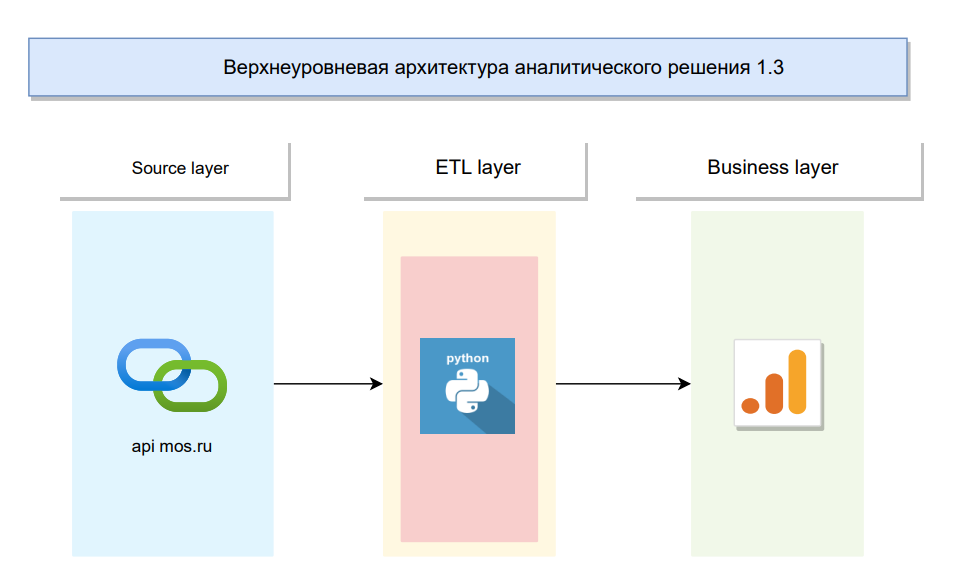

In [40]:
# import modules
import certifi
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import urllib3
from urllib3 import request
from unicodedata import normalize

# Импорт стандартных пакетов
import pandas as pd

# Для парсинга веб-страниц
import requests as reqs
import urllib.request
from bs4 import BeautifulSoup
import json
import os
import pprint

# Для выполнения операций с регулярными выражениями
import re

from bs4 import BeautifulSoup as bso

In [41]:
import requests

resp = requests.request(method='GET', url='https://apidata.mos.ru/v1/datasets/2981/features?api_key=c4e60190-fb89-4e8e-8c47-43d2a14ca3cd') 
headers = {'Accept': 'application/json'} 
response = requests.get(resp.url, headers=headers)

In [42]:
print(f"URL: \n\t {resp.url}")

URL: 
	 https://apidata.mos.ru/v1/datasets/2981/features?api_key=c4e60190-fb89-4e8e-8c47-43d2a14ca3cd


In [43]:
print(f"Content type: \n\t {resp.headers['content-type']}")

Content type: 
	 application/json


In [44]:
if response.status_code == 200:
    json_data = response.json()  # Преобразуем JSON-ответ в словарь Python

    features = json_data['features']

    # Создаем датафрейм из полученных данных
    zkh = pd.json_normalize(features)
else:
    print('Запрос вернул статус:', response.status_code)

In [45]:
zkh

,geometry,type,properties.datasetId,properties.attributes.is_deleted,properties.attributes.ID,properties.attributes.AdmArea,properties.attributes.Month,properties.attributes.Year,properties.attributes.TotalAmount,properties.attributes.Suppliers,properties.attributes.global_id,properties.rowId,properties.versionNumber,properties.releaseNumber
0,None,Feature,2981,0,1,Центральный административный округ,Апрель,2016,1.033089e+09,"[{'is_deleted': 0, 'global_id': 283, 'Supplier...",171671233,None,1,77
1,None,Feature,2981,0,2,Северный административный округ,Апрель,2016,1.416996e+09,"[{'is_deleted': 0, 'global_id': 290, 'Supplier...",171671234,None,1,77
2,None,Feature,2981,0,3,Северо-Восточный административный округ,Апрель,2016,1.593702e+09,"[{'is_deleted': 0, 'global_id': 297, 'Supplier...",171671235,None,1,77
3,None,Feature,2981,0,4,Восточный административный округ,Апрель,2016,1.835590e+09,"[{'is_deleted': 0, 'global_id': 304, 'Supplier...",171671236,None,1,77
4,None,Feature,2981,0,5,Юго-Восточный административный округ,Апрель,2016,1.684636e+09,"[{'is_deleted': 0, 'global_id': 312, 'Supplier...",171671237,None,1,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,None,Feature,2981,0,1071,Центральный административный округ,Март,2023,1.680960e+09,"[{'is_deleted': 0, 'global_id': 7310, 'Supplie...",2580692591,None,1,77
996,None,Feature,2981,0,1072,Северный административный округ,Март,2023,2.381542e+09,"[{'is_deleted': 0, 'global_id': 7317, 'Supplie...",2580692659,None,1,77
997,None,Feature,2981,0,1073,Северо-Восточный административный округ,Март,2023,2.634209e+09,"[{'is_deleted': 0, 'global_id': 7324, 'Supplie...",2580692737,None,1,77
998,None,Feature,2981,0,1074,Восточный административный округ,Март,2023,2.719724e+09,"[{'is_deleted': 0, 'global_id': 7331, 'Supplie...",2580692824,None,1,77


In [46]:
zkh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry                           0 non-null      object 
 1   type                               1000 non-null   object 
 2   properties.datasetId               1000 non-null   int64  
 3   properties.attributes.is_deleted   1000 non-null   int64  
 4   properties.attributes.ID           1000 non-null   int64  
 5   properties.attributes.AdmArea      1000 non-null   object 
 6   properties.attributes.Month        1000 non-null   object 
 7   properties.attributes.Year         1000 non-null   int64  
 8   properties.attributes.TotalAmount  1000 non-null   float64
 9   properties.attributes.Suppliers    1000 non-null   object 
 10  properties.attributes.global_id    1000 non-null   int64  
 11  properties.rowId                   0 non-null      object

In [47]:
zkh = zkh.drop(columns=zkh.columns[:4])
zkh = zkh.iloc[:, :-5]

In [48]:
zkh.rename(columns=lambda x: x.replace('properties.attributes.', ''), inplace=True)

In [49]:
zkh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1000 non-null   int64  
 1   AdmArea      1000 non-null   object 
 2   Month        1000 non-null   object 
 3   Year         1000 non-null   int64  
 4   TotalAmount  1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [50]:
zkh.head()

,ID,AdmArea,Month,Year,TotalAmount
0,1,Центральный административный округ,Апрель,2016,1.033089e+09
1,2,Северный административный округ,Апрель,2016,1.416996e+09
2,3,Северо-Восточный административный округ,Апрель,2016,1.593702e+09
3,4,Восточный административный округ,Апрель,2016,1.835590e+09
4,5,Юго-Восточный административный округ,Апрель,2016,1.684636e+09


In [51]:
zkh = zkh.drop(['ID'], axis=1)
zkh

,AdmArea,Month,Year,TotalAmount
0,Центральный административный округ,Апрель,2016,1.033089e+09
1,Северный административный округ,Апрель,2016,1.416996e+09
2,Северо-Восточный административный округ,Апрель,2016,1.593702e+09
3,Восточный административный округ,Апрель,2016,1.835590e+09
4,Юго-Восточный административный округ,Апрель,2016,1.684636e+09
...,...,...,...,...
995,Центральный административный округ,Март,2023,1.680960e+09
996,Северный административный округ,Март,2023,2.381542e+09
997,Северо-Восточный административный округ,Март,2023,2.634209e+09
998,Восточный административный округ,Март,2023,2.719724e+09


In [52]:
zkh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AdmArea      1000 non-null   object 
 1   Month        1000 non-null   object 
 2   Year         1000 non-null   int64  
 3   TotalAmount  1000 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [53]:
zkh['TotalAmount'] = zkh['TotalAmount'].astype(float)
zkh['TotalAmount'] = zkh['TotalAmount'].astype(float).round(0)
zkh['TotalAmount'] = zkh['TotalAmount'].astype(int)

zkh

,AdmArea,Month,Year,TotalAmount
0,Центральный административный округ,Апрель,2016,1033089057
1,Северный административный округ,Апрель,2016,1416996034
2,Северо-Восточный административный округ,Апрель,2016,1593702061
3,Восточный административный округ,Апрель,2016,1835590452
4,Юго-Восточный административный округ,Апрель,2016,1684636395
...,...,...,...,...
995,Центральный административный округ,Март,2023,1680960450
996,Северный административный округ,Март,2023,-2147483648
997,Северо-Восточный административный округ,Март,2023,-2147483648
998,Восточный административный округ,Март,2023,-2147483648


In [54]:
zkh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AdmArea      1000 non-null   object
 1   Month        1000 non-null   object
 2   Year         1000 non-null   int64 
 3   TotalAmount  1000 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 27.5+ KB


In [55]:
df1 = zkh.pivot_table(index='AdmArea', values='TotalAmount', aggfunc='sum').sort_values(by='TotalAmount', ascending=False).head(9)
df1

,TotalAmount
AdmArea,
Западный административный округ,133528796508
Северный административный округ,125197641471
Центральный административный округ,107274195813
Северо-Западный административный округ,105587644239
Северо-Восточный административный округ,83834999195
Зеленоградский административный округ,34440006881
Новомосковский административный округ,20651008921
Юго-Восточный административный округ,14664601562
Троицкий административный округ,7409007033


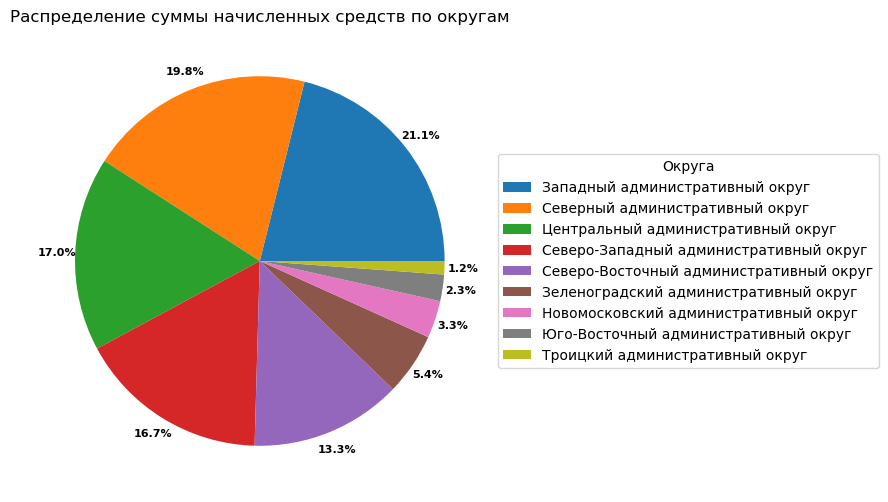

In [56]:
import matplotlib.pyplot as plt

# Создание круговой диаграммы с добавлением заголовка и легенды
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(df1['TotalAmount'], labels=['' for _ in df1.index], autopct='%1.1f%%', pctdistance=1.1)

plt.setp(autotexts, size=8, weight="bold")  # увеличиваем размер и делаем текст жирным
plt.title('Распределение суммы начисленных средств по округам')

# Создание легенды
plt.legend(wedges, df1.index, title="Округа", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Вывод: меньше всего средств начислено в Троицкий административный округ, Юго-Восточный административный округ, Новомосковский административный округ